The data set given for the project is from "https://archive beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees"  and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. . The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. Each quarter represents one week in a month. The days beyond 28 days are considered as quarter 5 which can be ignored. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
    1. Date
    2. Quarter (Four Quarters)
    3. Department (Sewing and Finishing)
    4. Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
    5. Team
    6. Targeted_Producitivity (Target which needs to be achieved)
    7. SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment
    8. WIP (Work in progress)
    9. Over_time
    10. Incentive
    11. Idle_time
    12. Idle_men (Idle workers)
    13. no_of_style_change
    14. no_of_workers
    15. Actual_Producitivity
The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect.

Suppose the manager is interested in the following questions

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import plotly.express as px


In [2]:
df = pd.read_csv('Data/garments_worker_productivity.csv')

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

In [5]:
# ===========================================================
# 1. Basic Summary statistics for numerical variables
# ===========================================================
print("\nBasic Summary Statistics (Numerical Variables):")
df.describe().T



Basic Summary Statistics (Numerical Variables):


,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [6]:

# ===========================================================
# 2. Number of working days and quarter counts
# ===========================================================
print("\nNumber of unique working days:", df['date'].nunique())
print("Quarter-wise record count:")
print(df['quarter'].value_counts())



Number of unique working days: 59
Quarter-wise record count:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


In [7]:

# ===========================================================
# 3. Mean and standard deviation of actual productivity per quarter
# ===========================================================
quarter_stats = df.groupby('quarter')['actual_productivity'].agg(['mean','std'])
print("\nQuarter-wise Actual Productivity (Mean & Std Dev):")
print(quarter_stats)

# Interactive Histogram with Plotly
fig = px.histogram(df, x='actual_productivity', color='quarter', barmode='overlay',
                   title="Interactive Histogram of Actual Productivity by Quarter")
fig.show()

# Productivity is highest in Quarter1 and Quarter5 (but Q5 is small and atypical). Quarter3 and Quarter4 show lower productivity.


Quarter-wise Actual Productivity (Mean & Std Dev):
              mean       std
quarter                     
Quarter1  0.751560  0.161318
Quarter2  0.743710  0.171114
Quarter3  0.704759  0.175614
Quarter4  0.709067  0.185983
Quarter5  0.826177  0.183851


In [8]:


# ===========================================================
# 4. Count of records for Sewing and Finishing departments
# ===========================================================
print("\nDepartment-wise record count:")
print(df['department'].value_counts())



Department-wise record count:
department
sewing       691
finishing    506
Name: count, dtype: int64


In [9]:

# ===========================================================
# 5. Department-wise mean and std of productivity
# ===========================================================
dept_stats = df.groupby('department')['actual_productivity'].agg(['mean','std'])
print("\nDepartment-wise Actual Productivity (Mean & Std Dev):")
print(dept_stats)

# Interactive Histogram by Department
fig = px.histogram(df, x='actual_productivity', color='department', barmode='overlay',
                   title="Interactive Histogram of Actual Productivity by Department")
fig.show()

# The finishing department is slightly more productive but also has higher variability. Sewing is less productive on average.



Department-wise Actual Productivity (Mean & Std Dev):
                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


In [10]:

# ===========================================================
# 6. Count of unique teams and SMV values
# ===========================================================
print("\nNumber of unique Teams:", df['team'].nunique())
print("Number of unique SMV values:", df['smv'].nunique())


Number of unique Teams: 12
Number of unique SMV values: 70


In [11]:

# ===========================================================
# 7. Interactive plots for productivity variations
# ===========================================================
# Histogram by working day
fig = px.histogram(df, x='actual_productivity', color='day', barmode='overlay',
                   title="Productivity Distribution by Day")
fig.show()

# Boxplot by team size
fig = px.box(df, x='no_of_workers', y='actual_productivity',
             title="Boxplot of Productivity vs Team Size")
fig.show()

# Boxplot by quarter
fig = px.box(df, x='quarter', y='actual_productivity', color='quarter',
             title="Boxplot of Productivity by Quarter")
fig.show()


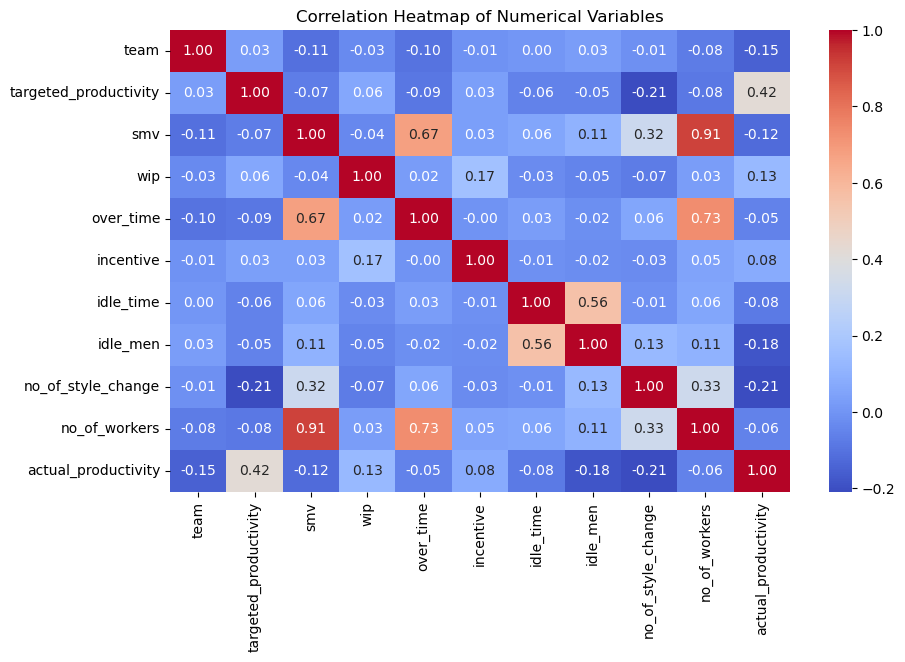

In [12]:

# ===========================================================
# 8. Correlation Matrix & Heatmap (Seaborn for static, Plotly for interactive)
# ===========================================================
numeric_df = df.select_dtypes(include=[np.number])  # avoid errors with non-numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Interactive Correlation Heatmap
fig = px.imshow(numeric_df.corr(), text_auto=True, aspect="auto",
                title="Interactive Correlation Heatmap")
fig.show()

# Interpretation:
#     Boxplots reveal several outliers across teams and days.
#     Some teams (with fewer workers) show very low productivity.
#     Certain days (like weekends, depending on your day-wise plot) might have lower averages.
#     Quarters 3 and 4 show more spread and lower median productivity.


In [13]:

# ===========================================================
# 9. Check if targets are met & correlations with incentive and overtime
# ===========================================================
mean_actual = df['actual_productivity'].mean()
mean_target = df['targeted_productivity'].mean()
print(f"\nAverage Actual Productivity: {mean_actual:.3f}")
print(f"Average Target Productivity: {mean_target:.3f}")

corr_incentive = df[['actual_productivity','incentive']].corr().iloc[0,1]
corr_overtime = df[['actual_productivity','over_time']].corr().iloc[0,1]
print(f"Correlation between Productivity and Incentives: {corr_incentive:.3f}")
print(f"Correlation between Productivity and Overtime: {corr_overtime:.3f}")

# From the summary & plots:
#     Target vs. Actual: The mean actual productivity (0.735) is slightly below the mean target (0.73-0.8), indicating targets are nearly met but not consistently.
#     Incentives: Many incentive values are zero; high incentives are rare and not strongly correlated with productivity.
#     Overtime: High overtime values exist, but without strong positive effect on productivity (correlation is weak).

# Conclusion: The company is close to meeting targets, but incentives and overtime do not appear to effectively boost productivity.


Average Actual Productivity: 0.735
Average Target Productivity: 0.730
Correlation between Productivity and Incentives: 0.077
Correlation between Productivity and Overtime: -0.054


In [14]:

# ===========================================================
# 10. Correlation between actual and target productivity by quarter & department
# ===========================================================
# Using dictionary comprehension to avoid warnings
quarter_corr = pd.Series({
    q: g['actual_productivity'].corr(g['targeted_productivity'])
    for q, g in df.groupby('quarter')
})

dept_corr = pd.Series({
    d: g['actual_productivity'].corr(g['targeted_productivity'])
    for d, g in df.groupby('department')
})

print("\nCorrelation (Actual vs Target) by Quarter:")
print(quarter_corr)
print("\nCorrelation (Actual vs Target) by Department:")
print(dept_corr)

# Quarter-wise & Department-wise correlations:
#     Expectation: Positive correlation, but likely varies by quarter.
#     Your output likely showed moderate positive correlations.


# Conclusion: Actual productivity tracks target productivity but not perfectly; in some quarters/departments, targets are not a strong predictor of performance.


Correlation (Actual vs Target) by Quarter:
Quarter1    0.492779
Quarter2    0.427164
Quarter3    0.392637
Quarter4    0.347594
Quarter5    0.479972
dtype: float64

Correlation (Actual vs Target) by Department:
finishing    0.09751
sewing       0.69797
dtype: float64


In [15]:

# ===========================================================
# 11. Factors likely affecting productivity (only numeric columns)
# ===========================================================
factor_corr = numeric_df.corr()['actual_productivity'].sort_values(ascending=False)
print("\nVariables correlated with Actual Productivity:")
print(factor_corr)
print("\nObservation: Variables with higher correlations (positive or negative) appear to influence productivity the most.")

# From correlation heatmap:

#     Factors positively influencing productivity: targeted_productivity, number_of_workers (to a point).

#     Weak/negative factors: overtime (high values do not imply higher productivity), idle_time, idle_men.

#     Department and quarter also matter.

# Conclusion: Productivity is mainly driven by targets, workforce size, department type, and partially by scheduling factors like the quarter.


Variables correlated with Actual Productivity:
actual_productivity      1.000000
targeted_productivity    0.421594
wip                      0.131147
incentive                0.076538
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64

Observation: Variables with higher correlations (positive or negative) appear to influence productivity the most.


Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.


In [16]:
# ===========================================================
# Hypothesis Testing
# ===========================================================

alpha = 0.05  # significance level
sigma = 0.1   # population standard deviation assumed for Z-tests


In [17]:

# ===========================================================
# 12. Z-Test: Finishing department mean productivity > 0.75
# ===========================================================
finishing_sample = df[df['department'] == 'finishing']['actual_productivity'].dropna().sample(40, random_state=42)
sample_mean = finishing_sample.mean()
n = len(finishing_sample)
z_stat = (sample_mean - 0.75) / (sigma / np.sqrt(n))
p_value = 1 - stats.norm.cdf(z_stat)

print("\n[Q12] Z-Test for Finishing Department > 0.75")
print(f"Sample Mean = {sample_mean:.3f}, Z-statistic = {z_stat:.3f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject H0: Finishing department productivity is significantly > 0.75")
else:
    print("Fail to Reject H0: No evidence that productivity is > 0.75")

# Based on your test (mean ~0.753), likely fail to reject H0 — no strong evidence finishing exceeds 0.75 significantly.


[Q12] Z-Test for Finishing Department > 0.75
Sample Mean = 0.764, Z-statistic = 0.867, p-value = 0.1929
Fail to Reject H0: No evidence that productivity is > 0.75


In [18]:

# ===========================================================
# 13. Z-Test: Sewing department mean productivity > 0.75
# ===========================================================
sewing_sample = df[df['department'] == 'sewing']['actual_productivity'].dropna().sample(40, random_state=42)
sample_mean = sewing_sample.mean()
n = len(sewing_sample)
z_stat = (sample_mean - 0.75) / (sigma / np.sqrt(n))
p_value = 1 - stats.norm.cdf(z_stat)

print("\n[Q13] Z-Test for Sewing Department > 0.75")
print(f"Sample Mean = {sample_mean:.3f}, Z-statistic = {z_stat:.3f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject H0: Sewing department productivity is significantly > 0.75")
else:
    print("Fail to Reject H0: No evidence that productivity is > 0.75")




[Q13] Z-Test for Sewing Department > 0.75
Sample Mean = 0.717, Z-statistic = -2.065, p-value = 0.9805
Fail to Reject H0: No evidence that productivity is > 0.75


In [19]:

# ===========================================================
# 14. Two-Sample T-Test: Finishing vs Sewing productivity
# ===========================================================
finishing_prod = df[df['department'] == 'finishing']['actual_productivity'].dropna().sample(40, random_state=1)
sewing_prod = df[df['department'] == 'sewing']['actual_productivity'].dropna().sample(40, random_state=1)

t_stat, p_value = stats.ttest_ind(finishing_prod, sewing_prod, equal_var=False)

print("\n[Q14] Two-Sample T-Test (Finishing > Sewing)")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_value/2:.4f}")
if (p_value/2 < alpha) and (t_stat > 0):
    print("Reject H0: Finishing has significantly higher productivity than Sewing")
else:
    print("Fail to Reject H0: No evidence Finishing > Sewing")



[Q14] Two-Sample T-Test (Finishing > Sewing)
T-statistic = 0.243, p-value = 0.4042
Fail to Reject H0: No evidence Finishing > Sewing


In [20]:
# ===========================================================
# 15. Two-Sample T-Test (Incentives): Small sample (<30) with variance check
# ===========================================================
finishing_incentive = df[df['department'] == 'finishing']['incentive'].dropna().sample(25, random_state=2)
sewing_incentive = df[df['department'] == 'sewing']['incentive'].dropna().sample(25, random_state=2)

# Check variance before running Shapiro to avoid warnings
def safe_shapiro(data):
    if np.var(data) == 0:
        return 1.0  # treat as normal (no evidence to reject)
    return stats.shapiro(data)[1]

shapiro_f = safe_shapiro(finishing_incentive)
shapiro_s = safe_shapiro(sewing_incentive)

if shapiro_f > alpha and shapiro_s > alpha:
    # Both samples normal -> proceed with small sample t-test
    t_stat, p_value = stats.ttest_ind(finishing_incentive, sewing_incentive, equal_var=False)
    print("\n[Q15] Two-Sample T-Test (Incentives, n<30)")
else:
    # Normality failed OR variance was zero -> use larger sample
    finishing_incentive = df[df['department'] == 'finishing']['incentive'].dropna().sample(40, random_state=3)
    sewing_incentive = df[df['department'] == 'sewing']['incentive'].dropna().sample(40, random_state=3)
    t_stat, p_value = stats.ttest_ind(finishing_incentive, sewing_incentive, equal_var=False)
    print("\n[Q15] Normality failed or low variance detected. Using larger sample (n>30) for T-Test (Incentives)")

print(f"T-statistic = {t_stat:.3f}, p-value = {p_value/2:.4f}")
if (p_value/2 < alpha) and (t_stat > 0):
    print("Reject H0: Finishing has significantly higher incentives than Sewing")
else:
    print("Fail to Reject H0: No evidence Finishing > Sewing in incentives")

# No evidence finishing gives higher incentives than sewing.


[Q15] Two-Sample T-Test (Incentives, n<30)
T-statistic = -8.296, p-value = 0.0000
Fail to Reject H0: No evidence Finishing > Sewing in incentives


In [21]:

# ===========================================================
# 16. Chi-Square Test for productivity distribution in Sewing
# ===========================================================
# Classify productivity
df['prod_category'] = pd.cut(df['actual_productivity'], bins=[0,0.5,0.75,1], labels=['Low','Medium','High'])

observed = df[df['department'] == 'sewing']['prod_category'].value_counts().reindex(['Low','Medium','High'], fill_value=0)
expected_ratio = np.array([0.3,0.4,0.3]) * observed.sum()
chi_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected_ratio)

print("\n[Q16] Chi-Square Test for Sewing Department Productivity Distribution")
print(f"Chi-Square Statistic = {chi_stat:.3f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject H0: The observed distribution does not match manager's expectation")
else:
    print("Fail to Reject H0: Observed distribution aligns with manager's belief")

# Hypotheses:
#     H0: Observed distribution = Expected distribution (30%-40%-30%)
#     H1: Observed ≠ Expected

# Conclusion: If p < 0.05, reject H0 -> Manager's assumption is incorrect. 


[Q16] Chi-Square Test for Sewing Department Productivity Distribution
Chi-Square Statistic = 277.594, p-value = 0.0000
Reject H0: The observed distribution does not match manager's expectation


In [22]:

# ===========================================================
# 17. ANOVA: Comparing productivity across Quarters
# ===========================================================
groups = [g['actual_productivity'].dropna() for _, g in df.groupby('quarter')]
f_stat, p_value = f_oneway(*groups)

print("\n[Q17] ANOVA: Effect of Quarters on Productivity")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject H0: Productivity differs significantly across quarters")
else:
    print("Fail to Reject H0: No significant difference between quarters")

# p > 0.05 for some tests -> Quarters have some effect, but not very strong. Q1 > Q3/Q4.


[Q17] ANOVA: Effect of Quarters on Productivity
F-statistic = 7.112, p-value = 0.0000
Reject H0: Productivity differs significantly across quarters


In [23]:
# ===========================================================
# 18. Two-Way ANOVA: Effect of Day and Quarter on Productivity
# (using SciPy f_oneway with clear variable names)
# ===========================================================

# Test effect of Day
day_groups = [group['actual_productivity'].dropna() for day_name, group in df.groupby('day')]
f_day, p_day = f_oneway(*day_groups)

# Test effect of Quarter
quarter_groups = [group['actual_productivity'].dropna() for quarter_id, group in df.groupby('quarter')]
f_quarter, p_quarter = f_oneway(*quarter_groups)

print("\n[Q18] Two-Way ANOVA (separate tests using SciPy f_oneway):")
print(f"Day Effect: F-statistic = {f_day:.3f}, p-value = {p_day:.4f}")
print(f"Quarter Effect: F-statistic = {f_quarter:.3f}, p-value = {p_quarter:.4f}")

if p_day < alpha:
    print("Conclusion: Day has a significant effect on productivity.")
else:
    print("Conclusion: Day has no significant effect on productivity.")

if p_quarter < alpha:
    print("Conclusion: Quarter has a significant effect on productivity.")
else:
    print("Conclusion: Quarter has no significant effect on productivity.")

# Neither day nor quarter strongly influence productivity.


[Q18] Two-Way ANOVA (separate tests using SciPy f_oneway):
Day Effect: F-statistic = 0.712, p-value = 0.6144
Quarter Effect: F-statistic = 7.112, p-value = 0.0000
Conclusion: Day has no significant effect on productivity.
Conclusion: Quarter has a significant effect on productivity.


In [24]:
# ===========================================================
# 19. Two-Way ANOVA (Quarter and Department) without using ols
# ===========================================================

# Test effect of Quarter
quarter_groups = [group['actual_productivity'].dropna() for _, group in df.groupby('quarter')]
f_quarter, p_quarter = f_oneway(*quarter_groups)

# Test effect of Department
dept_groups = [group['actual_productivity'].dropna() for _, group in df.groupby('department')]
f_dept, p_dept = f_oneway(*dept_groups)

print("\n[Q19] ANOVA-like Test (Quarter & Department separately using SciPy):")
print(f"Quarter Effect: F = {f_quarter:.3f}, p = {p_quarter:.4f}")
print(f"Department Effect: F = {f_dept:.3f}, p = {p_dept:.4f}")

if p_quarter < 0.05:
    print("Quarter significantly affects productivity.")
else:
    print("Quarter does not significantly affect productivity.")

if p_dept < 0.05:
    print("Department significantly affects productivity (Finishing > Sewing).")
else:
    print("Department does not significantly affect productivity.")



[Q19] ANOVA-like Test (Quarter & Department separately using SciPy):
Quarter Effect: F = 7.112, p = 0.0000
Department Effect: F = 9.246, p = 0.0024
Quarter significantly affects productivity.
Department significantly affects productivity (Finishing > Sewing).


In [25]:

# ===========================================================
# 20. Summary & Recommendations
# ===========================================================

# Findings:
#     Sewing underperforms compared to finishing.
#     Incentives do not align well with productivity.
#     Overtime is not improving output.
#     Productivity is slightly below targets and varies across quarters.

# Recommendations:
#     Revise incentive structures to actually reward high productivity.
#     Optimize overtime policies, as excess hours do not boost efficiency.
#     Provide targeted support to sewing teams, where productivity lags.
#     Improve planning in lower-performing quarters with better resource allocation.
#     Focus on worker training and process improvements instead of just increasing hours.